In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [8]:
etfs_data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data", "inputs", "wrds_etf_returns.csv"))

etfs_data["date"] = pd.to_datetime(etfs_data["date"])
etfs_data.set_index("date", inplace=True)
etfs_data = etfs_data.resample("B").last().ffill()

# # compute log returns
# returns_data = np.log(etfs_data).diff(22)
returns_data = etfs_data.copy()
returns_data = returns_data[[col for col in returns_data.columns if "t+1" not in col]]

returns_data.tail()

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,
2022-11-24,0.078142,0.085491,0.222866,0.112646,0.130101,0.073741,0.086236,0.019200,0.091768,0.011031
2022-11-25,0.078142,0.085491,0.222866,0.112646,0.130101,0.073741,0.086236,0.019200,0.091768,0.011031
2022-11-28,0.078142,0.085491,0.222866,0.112646,0.130101,0.073741,0.086236,0.019200,0.091768,0.011031
2022-11-29,0.078142,0.085491,0.222866,0.112646,0.130101,0.073741,0.086236,0.019200,0.091768,0.011031
2022-11-30,0.054102,0.110679,0.012697,0.066321,0.075212,0.061346,0.059379,0.067315,0.046150,0.014749


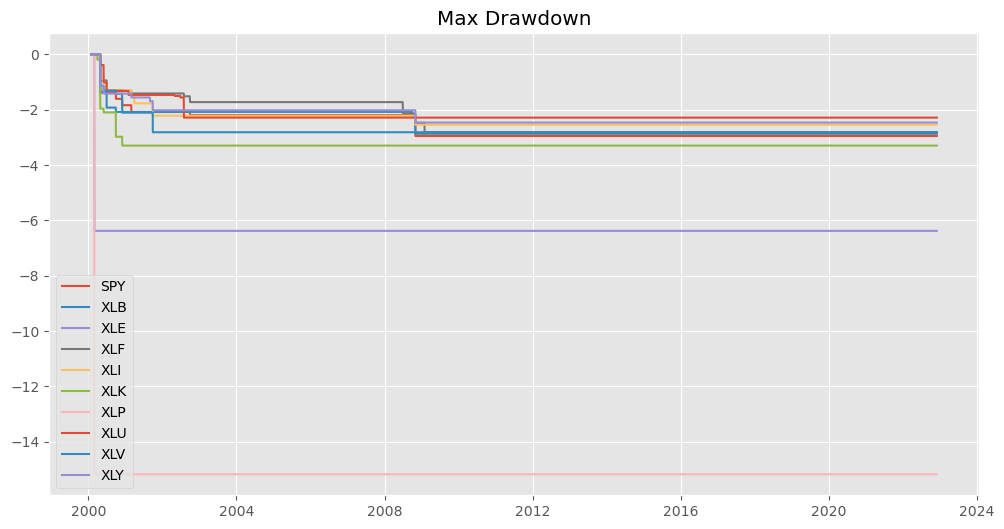

In [20]:
# compute max drawdown over time
cumulative_max = returns_data.cummax()

# Calculate drawdowns as the difference from the peak (cumulative max)
drawdowns = (returns_data - cumulative_max) / cumulative_max

# Calculate the cumulative minimum of the drawdowns to get the maximum drawdown up to each point
max_drawdown_series = drawdowns.cummin()

# plot max drawdown
plt.figure(figsize=(12, 6))
plt.plot(max_drawdown_series)
plt.title("Max Drawdown")
plt.legend(max_drawdown_series.columns)
plt.show()